In [1]:
from med_edge_analysis.data_reader.json_reader import load_dataset
import numpy as np
from loguru import logger
import pandas as pd

# Load the data without features to understand the format

In [2]:
test_raw= load_dataset(dataset_name="AfrimedQA", model="openai_gpt-oss-120b", split="test", extract_features=False)[0]
med_qa_raw = load_dataset(dataset_name="med_qa", model="openai_gpt-oss-120b", split="test", extract_features=False)[0]


2025-11-28 11:31:52.478 | WARNING  | med_edge_analysis.data_reader.json_reader:_read_jsonl:111 - Found 0 inconsistent sample_ids to skip
2025-11-28 11:32:02.214 | WARNING  | med_edge_analysis.data_reader.json_reader:_read_jsonl:111 - Found 0 inconsistent sample_ids to skip


In [3]:
test_raw.pandas_df.head()

,answer,ground_truth,is_correct,usage,reasoning_content,finish_reason,temperature,max_tokens,reasoning_effort,logprobs,dataset_name,dataset_config,split_name,question_index,sample_id,is_hard,question,options,meta_info,question_hash
0,d,d,True,"{'prompt_tokens': 272, 'completion_tokens': 14...",We need to determine which bariatric procedure...,stop,1.0,32768,medium,"{'content': [{'token': '<|channel|>', 'logprob...",medagents-benchmark,AfrimedQA,test,0,medagents-benchmark_AfrimedQA_a7ee602bfd80746f...,False,You are counseling the family of a 15-year-old...,{'a': 'Laparoscopic adjustable gastric banding...,,27a416e4ce53a5ca2250ba3c131acaf6
1,d,b,False,"{'prompt_tokens': 233, 'completion_tokens': 88...",We need to determine indications for bariatric...,stop,1.0,32768,medium,"{'content': [{'token': '<|channel|>', 'logprob...",medagents-benchmark,AfrimedQA,test,1,medagents-benchmark_AfrimedQA_06bcc20456d81d9d...,False,A 14-year-old male is being assessed for weigh...,"{'a': 'BMI 32 and Type II diabetes', 'b': 'BMI...",,53e300cd440b301ea5abdbccf8bef459
2,c,c,True,"{'prompt_tokens': 228, 'completion_tokens': 19...",We need to know classification of BMI percenti...,stop,1.0,32768,medium,"{'content': [{'token': '<|channel|>', 'logprob...",medagents-benchmark,AfrimedQA,test,2,medagents-benchmark_AfrimedQA_2d6206ab0285667d...,False,\r\n A 15-year-old female presents to a specia...,"{'a': 'Obese', 'b': 'Normal', 'c': 'Overweight...",,5c7992b6572c98c52ca71051b4b7e8e8
3,d,d,True,"{'prompt_tokens': 276, 'completion_tokens': 40...","We need to interpret the question: ""Following ...",stop,1.0,32768,medium,"{'content': [{'token': '<|channel|>', 'logprob...",medagents-benchmark,AfrimedQA,test,3,medagents-benchmark_AfrimedQA_85de0d8a61bbf0c8...,False,Following resection of a patent urachus and bl...,{'a': 'Discharge when well with catheter in si...,,7ab97ca8466b43457b73d2a54e3f41ff
4,d,d,True,"{'prompt_tokens': 288, 'completion_tokens': 19...",We need to determine appropriate surgical mana...,stop,1.0,32768,medium,"{'content': [{'token': '<|channel|>', 'logprob...",medagents-benchmark,AfrimedQA,test,4,medagents-benchmark_AfrimedQA_7482c32ae9a86024...,True,A 1-week old term baby presents with clear flu...,{'a': 'Suture ligate the patent urachus at the...,,271cfdf3c573c0bce69cdb54ff72a43b


In [4]:
med_qa_raw.pandas_df.head()

,answer,ground_truth,is_correct,usage,reasoning_content,finish_reason,temperature,max_tokens,reasoning_effort,logprobs,dataset_name,split_name,question_index,sample_id,question,options,question_hash
0,c,c,True,"{'prompt_tokens': 340, 'completion_tokens': 33...","We have a scenario: junior ortho resident, att...",stop,1.0,32768,medium,"{'content': [{'token': '<|channel|>', 'logprob...",medqa,test,0,medqa__15985913899123410511,A junior orthopaedic surgery resident is compl...,{'a': 'Disclose the error to the patient but l...,59e1dc452de9c0677d2e26f8da3f963a
1,e,e,True,"{'prompt_tokens': 290, 'completion_tokens': 44...",We need drug causing sensorineural hearing los...,stop,1.0,32768,medium,"{'content': [{'token': '<|channel|>', 'logprob...",medqa,test,1,medqa__8010672018625099966,A 67-year-old man with transitional cell carci...,"{'a': 'Inhibition of thymidine synthesis', 'b'...",e5cb34a9749ef777b0ef1809e6967a4b
2,c,c,True,"{'prompt_tokens': 459, 'completion_tokens': 44...",We need to analyze scenario. Two weeks after c...,stop,1.0,32768,medium,"{'content': [{'token': '<|channel|>', 'logprob...",medqa,test,2,medqa__15199325197093863085,Two weeks after undergoing an emergency cardia...,"{'a': 'Renal papillary necrosis', 'b': 'Allerg...",fea3c562822a1be5cea31c7a50f4343d
3,d,d,True,"{'prompt_tokens': 470, 'completion_tokens': 88...",We need to parse the case. 39yo woman with fev...,stop,1.0,32768,medium,"{'content': [{'token': '<|channel|>', 'logprob...",medqa,test,3,medqa__4067334329997392403,A 39-year-old woman is brought to the emergenc...,"{'a': 'Coagulase-positive, gram-positive cocci...",70195ebdf8b1c2b3e07b2ba774995158
4,b,b,True,"{'prompt_tokens': 354, 'completion_tokens': 17...","We need to identify the condition: Itchy, wate...",stop,1.0,32768,medium,"{'content': [{'token': '<|channel|>', 'logprob...",medqa,test,4,medqa__14658959808577454122,A 35-year-old man comes to the physician becau...,"{'a': 'Erythromycin ointment', 'b': 'Ketotifen...",3dc28c0749ae783e03a661abda9a434b


## Dataset examples with features

In [ ]:
med_qa_train_features = load_dataset(dataset_name="med_qa", model="openai_gpt-oss-120b", split="test", extract_features=True)[0]

2025-11-28 11:32:22.974 | WARNING  | med_edge_analysis.data_reader.json_reader:_read_jsonl:111 - Found 0 inconsistent sample_ids to skip


In [19]:
med_qa_train_features.pandas_df.head()

,reasoning_avg_entropy,reasoning_max_entropy,reasoning_std_entropy,reasoning_min_entropy,reasoning_entropy_range,reasoning_entropy_cv,reasoning_avg_margin,reasoning_min_margin,entropy_start,entropy_middle,...,fast_negation_ratio,fast_question_density,fast_certainty_score,fast_analytical_score,fast_vocab_growth_rate,is_correct,sample_id,answer,ground_truth,question_hash
0,0.797519,2.632887,0.680763,-9.904613e-10,2.632887,0.853602,2.878688,-8.1250,0.766998,0.851926,...,0.026616,0.043478,0.000000,0.045627,0.713141,True,medqa__15985913899123410511,c,c,59e1dc452de9c0677d2e26f8da3f963a
1,0.475771,2.565428,0.601942,-9.991071e-10,2.565428,1.265192,6.579925,-5.0000,0.455883,0.530423,...,0.007519,0.066667,-0.600000,0.048872,0.710937,True,medqa__8010672018625099966,e,e,e5cb34a9749ef777b0ef1809e6967a4b
2,0.500854,2.536771,0.607633,-9.841967e-10,2.536771,1.213196,5.489465,-9.1875,0.451907,0.523069,...,0.030435,0.037037,-1.000000,0.034783,0.810606,True,medqa__15199325197093863085,c,c,fea3c562822a1be5cea31c7a50f4343d
3,0.550321,2.542300,0.681217,-9.971888e-10,2.542300,1.237855,6.533386,-17.4375,0.502555,0.462839,...,0.048872,0.236364,-0.655172,0.046992,0.755952,True,medqa__4067334329997392403,d,d,70195ebdf8b1c2b3e07b2ba774995158
4,0.405343,2.509755,0.521520,-9.773762e-10,2.509755,1.286614,7.039701,-4.3750,0.484159,0.371179,...,0.012346,0.000000,-1.000000,0.024691,0.893333,True,medqa__14658959808577454122,b,b,3dc28c0749ae783e03a661abda9a434b


# Try training with MEDQA as training and MEDAGENTS as test

In [20]:
MODEL_TO_USE = "openai_gpt-oss-120b"
from med_edge_analysis.constants import MEDAGENTS_DATASETS
medqa_splits = []
for split in ["train", "val", "test"]:
    datasets = load_dataset(dataset_name="med_qa", model=MODEL_TO_USE, split=split, extract_features=True)
    if datasets:
        medqa_splits.append(datasets[0].pandas_df)
        print(f"   {split}: {len(datasets[0].pandas_df)} records")

medqa_all = pd.concat(medqa_splits, ignore_index=True)
medqa_all['dataset_source'] = 'MedQA'
print(f"✅ TRAIN SET (MedQA): {len(medqa_all)} records total")

medagents_splits = []
for dataset_name in MEDAGENTS_DATASETS:
    datasets = load_dataset(dataset_name=dataset_name, model=MODEL_TO_USE, split="test", extract_features=True)
    if datasets:
        df = datasets[0].pandas_df
        df['dataset_source'] = dataset_name
        medagents_splits.append(df)
        print(f"   {dataset_name}: {len(df)} records")

medagents_all = pd.concat(medagents_splits, ignore_index=True)
print(f"✅ TEST SET (MedAgents): {len(medagents_all)} records from {len(medagents_splits)} datasets")

# =============================================================================
# CROSS-DATASET DEDUPLICATION
# =============================================================================
print("\n" + "="*80)
print("CROSS-DATASET DEDUPLICATION")
print("="*80)

# Combine all data
all_data_raw = pd.concat([medqa_all, medagents_all], ignore_index=True)
print(f"Total before dedup: {len(all_data_raw)} records")

# Find question_hash values that appear in multiple datasets
hash_dataset_counts = all_data_raw.groupby('question_hash')['dataset_source'].nunique()
duplicate_hashes = hash_dataset_counts[hash_dataset_counts > 1].index
print(f"Found {len(duplicate_hashes)} question hashes appearing in multiple datasets")

# Count how many records will be removed
records_to_remove = all_data_raw[all_data_raw['question_hash'].isin(duplicate_hashes)]
print(f"Removing {len(records_to_remove)} records total:")
for ds in records_to_remove['dataset_source'].unique():
    n = (records_to_remove['dataset_source'] == ds).sum()
    print(f"   - {ds}: {n} records")

# Remove duplicates
all_data_clean = all_data_raw[~all_data_raw['question_hash'].isin(duplicate_hashes)]
print(f"\nTotal after dedup: {len(all_data_clean)} records")

# Split back into MedQA and MedAgents
medqa_all = all_data_clean[all_data_clean['dataset_source'] == 'MedQA'].copy()
medagents_all = all_data_clean[all_data_clean['dataset_source'] != 'MedQA'].copy()

print(f"   MedQA: {len(medqa_all)} records")
print(f"   MedAgents: {len(medagents_all)} records")

# =============================================================================
# PREPARE X, y
# =============================================================================
METADATA_COLS = ['is_correct', 'is_correct_num', 'answer', 'ground_truth', 'sample_id', 'question_index', 'dataset_source', 'question_hash']
feature_cols = [col for col in medqa_all.columns if col not in METADATA_COLS]

X_train = medqa_all[feature_cols]
y_train = medqa_all['is_correct'].astype(int)

X_test = medagents_all[feature_cols]
y_test = medagents_all['is_correct'].astype(int)

print("\n" + "="*80)
print("FINAL SETUP (after deduplication)")
print("="*80)
print(f"🏋️  TRAIN (MedQA all splits):")
print(f"   Samples: {len(X_train)}")
print(f"   Accuracy baseline: {y_train.mean():.3f}")
print(f"   Right: {y_train.sum()} | Wrong: {len(y_train) - y_train.sum()}")

print(f"\n🧪 TEST (MedAgents all datasets):")
print(f"   Sample: {len(X_test)}")
print(f"   Accuracy baseline: {y_test.mean():.3f}")
print(f"   Right: {y_test.sum()} | Wrong: {len(y_test) - y_test.sum()}")
print(f"   Features: {len(feature_cols)}")

2025-11-28 11:17:56.670 | WARNING  | med_edge_analysis.data_reader.json_reader:_read_jsonl:111 - Found 2 inconsistent sample_ids to skip
2025-11-28 11:20:04.731 | INFO     | med_edge_analysis.data_reader.json_reader:_read_jsonl:204 - Feature extraction: 10178/10178 records (100.0% success, 0 skipped)


   train: 10174 records


2025-11-28 11:20:13.807 | WARNING  | med_edge_analysis.data_reader.json_reader:_read_jsonl:111 - Found 0 inconsistent sample_ids to skip
2025-11-28 11:20:29.212 | INFO     | med_edge_analysis.data_reader.json_reader:_read_jsonl:204 - Feature extraction: 1272/1272 records (100.0% success, 0 skipped)


   val: 1272 records


2025-11-28 11:20:38.321 | WARNING  | med_edge_analysis.data_reader.json_reader:_read_jsonl:111 - Found 0 inconsistent sample_ids to skip
2025-11-28 11:20:54.342 | INFO     | med_edge_analysis.data_reader.json_reader:_read_jsonl:204 - Feature extraction: 1273/1273 records (100.0% success, 0 skipped)


   test: 1273 records
✅ TRAIN SET (MedQA): 12719 records total


2025-11-28 11:20:55.048 | WARNING  | med_edge_analysis.data_reader.json_reader:_read_jsonl:111 - Found 0 inconsistent sample_ids to skip
2025-11-28 11:20:56.743 | INFO     | med_edge_analysis.data_reader.json_reader:_read_jsonl:204 - Feature extraction: 174/174 records (100.0% success, 0 skipped)


   AfrimedQA: 174 records


2025-11-28 11:21:00.054 | WARNING  | med_edge_analysis.data_reader.json_reader:_read_jsonl:111 - Found 0 inconsistent sample_ids to skip
2025-11-28 11:21:04.069 | INFO     | med_edge_analysis.data_reader.json_reader:_read_jsonl:204 - Feature extraction: 308/308 records (100.0% success, 0 skipped)


   MedBullets: 308 records


2025-11-28 11:21:08.291 | WARNING  | med_edge_analysis.data_reader.json_reader:_read_jsonl:111 - Found 0 inconsistent sample_ids to skip
2025-11-28 11:21:14.517 | INFO     | med_edge_analysis.data_reader.json_reader:_read_jsonl:204 - Feature extraction: 935/935 records (100.0% success, 0 skipped)


   MedExQA: 935 records


2025-11-28 11:21:31.508 | WARNING  | med_edge_analysis.data_reader.json_reader:_read_jsonl:111 - Found 0 inconsistent sample_ids to skip
2025-11-28 11:22:03.746 | INFO     | med_edge_analysis.data_reader.json_reader:_read_jsonl:204 - Feature extraction: 2816/2816 records (100.0% success, 0 skipped)


   MedMCQA: 2816 records


2025-11-28 11:22:24.530 | WARNING  | med_edge_analysis.data_reader.json_reader:_read_jsonl:111 - Found 0 inconsistent sample_ids to skip
2025-11-28 11:23:05.280 | INFO     | med_edge_analysis.data_reader.json_reader:_read_jsonl:204 - Feature extraction: 1861/1861 records (100.0% success, 0 skipped)


   MedXpertQA-R: 1861 records


2025-11-28 11:23:10.968 | WARNING  | med_edge_analysis.data_reader.json_reader:_read_jsonl:111 - Found 0 inconsistent sample_ids to skip
2025-11-28 11:23:22.533 | INFO     | med_edge_analysis.data_reader.json_reader:_read_jsonl:204 - Feature extraction: 589/589 records (100.0% success, 0 skipped)


   MedXpertQA-U: 589 records


2025-11-28 11:23:27.636 | WARNING  | med_edge_analysis.data_reader.json_reader:_read_jsonl:111 - Found 0 inconsistent sample_ids to skip
2025-11-28 11:23:36.334 | INFO     | med_edge_analysis.data_reader.json_reader:_read_jsonl:204 - Feature extraction: 818/818 records (100.0% success, 0 skipped)


   MMLU-Pro: 818 records


2025-11-28 11:23:41.447 | WARNING  | med_edge_analysis.data_reader.json_reader:_read_jsonl:111 - Found 0 inconsistent sample_ids to skip
2025-11-28 11:23:51.725 | INFO     | med_edge_analysis.data_reader.json_reader:_read_jsonl:204 - Feature extraction: 1089/1089 records (100.0% success, 0 skipped)


   MMLU: 1089 records


2025-11-28 11:23:52.553 | WARNING  | med_edge_analysis.data_reader.json_reader:_read_jsonl:111 - Found 0 inconsistent sample_ids to skip
2025-11-28 11:23:54.702 | INFO     | med_edge_analysis.data_reader.json_reader:_read_jsonl:204 - Feature extraction: 500/500 records (100.0% success, 0 skipped)


   PubMedQA: 500 records
✅ TEST SET (MedAgents): 9090 records from 9 datasets

CROSS-DATASET DEDUPLICATION
Total before dedup: 21809 records
Found 454 question hashes appearing in multiple datasets
Removing 1026 records total:
   - MedQA: 36 records
   - MedBullets: 13 records
   - MedXpertQA-R: 26 records
   - MedXpertQA-U: 4 records
   - MMLU-Pro: 506 records
   - MMLU: 441 records

Total after dedup: 20783 records
   MedQA: 12683 records
   MedAgents: 8100 records

FINAL SETUP (after deduplication)
🏋️  TRAIN (MedQA all splits):
   Samples: 12683
   Accuracy baseline: 0.922
   Right: 11692 | Wrong: 991

🧪 TEST (MedAgents all datasets):
   Sample: 8100
   Accuracy baseline: 0.662
   Right: 5364 | Wrong: 2736
   Features: 49


In [21]:
import importlib
from med_edge_analysis.ml_utility import feature_engineering
from med_edge_analysis.ml_utility import hyperparameter_tuning
importlib.reload(feature_engineering)
importlib.reload(hyperparameter_tuning)

<module 'med_edge_analysis.ml_utility.hyperparameter_tuning' from '/home/edge7/Desktop/projects/ing_edurso/med_edge_analysis/med_edge_analysis/ml_utility/hyperparameter_tuning.py'>

COLLINEARITY REMOVAL (threshold: 0.9)
Original features: 49
Dropped features:  7
Remaining features: 42
Selection criterion: higher variance

Dropped                        Kept                             Corr   Drop Var   Keep Var
────────────────────────────── ────────────────────────────── ────── ────────── ──────────
reasoning_max_entropy          reasoning_entropy_range        1.000     0.0469     0.0469
ans_prob                       ans_entropy                    0.995     0.0000     0.0000
reasoning_min_margin           global_min_lp                  0.987     6.1161     6.4122
reasoning_entropy_cv           reasoning_avg_margin           0.947     0.0224     1.2425
global_avg_lp                  global_p10_lp                  0.939     0.0177     0.1696
fast_hapax_ratio               fast_vocabulary_richness       0.924     0.0092     0.0164
reasoning_avg_entropy          reasoning_entropy_cv           0.914     0.0124     0.0224
SHAP FEATURE SELECTION (7-fold CV)
Selection: 

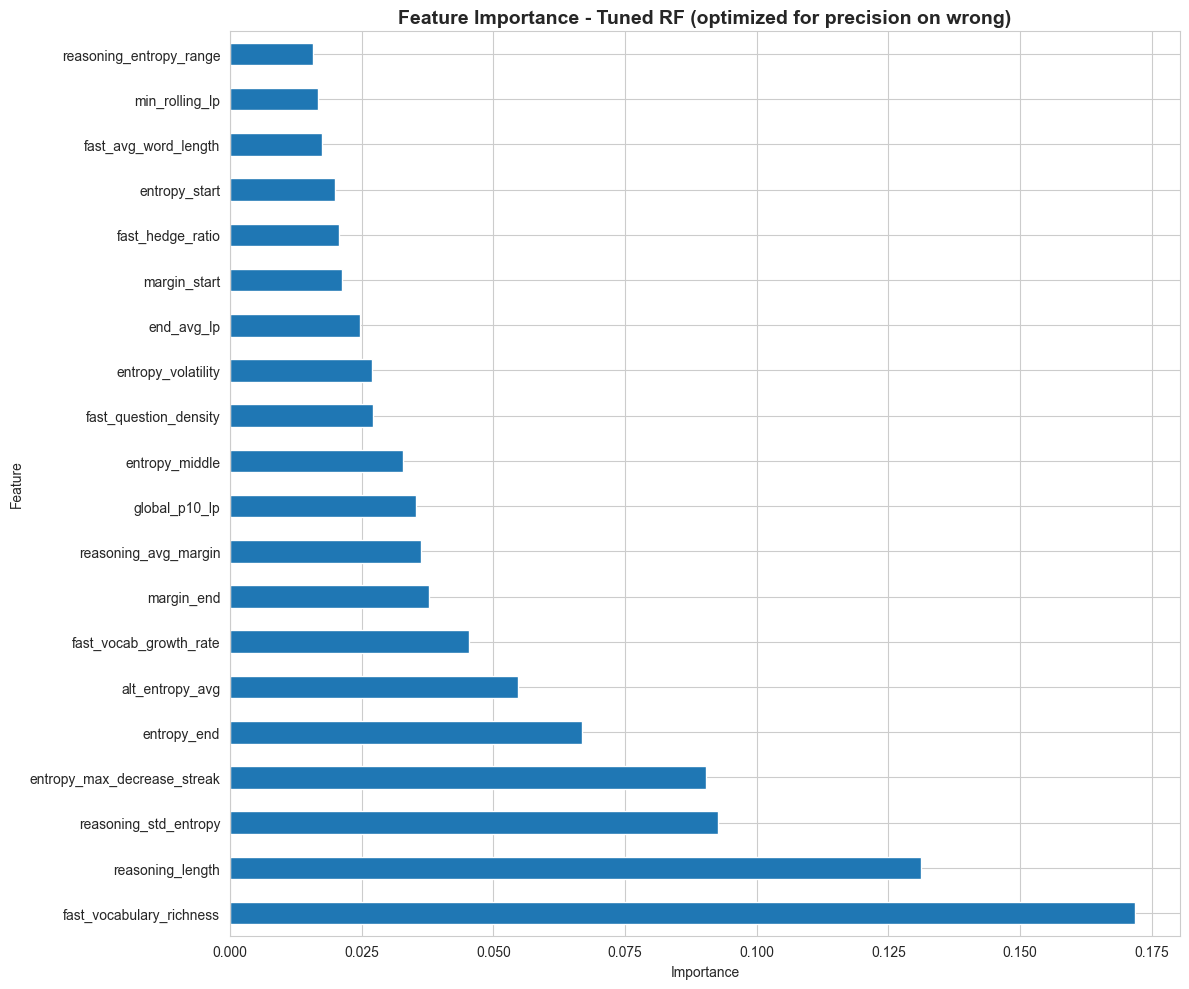


Training complete!
Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV precision_wrong score: 0.2390


In [22]:
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from med_edge_analysis.ml_utility.feature_engineering import (
    cv_shap_feature_selection, 
    remove_collinear_features,
)
from med_edge_analysis.ml_utility.hyperparameter_tuning import tune_classifier, get_default_param_grid

# Step 0: Remove collinear features FIRST
X_train_clean, dropped_features, corr_info = remove_collinear_features(
    X_train, 
    threshold=0.9,
    method="pearson"
)
X_test_clean = X_test[[col for col in X_test.columns if col not in dropped_features]]

# Phase 1: SHAP-based Feature Selection (RELAXED settings)
baseline = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=7, class_weight='balanced', n_jobs=-1)
selected_features, fold_results = cv_shap_feature_selection(
    clf=baseline,
    X=X_train_clean,
    y=y_train,
    n_splits=7,
    percentile_threshold=50,  # RELAXED: keep top 50% features per fold
)

# Filter features
X_train_filtered = X_train_clean[selected_features]
X_test_filtered = X_test_clean[selected_features]

print(f"\n{'='*60}")
print(f"FINAL FEATURE SET: {len(selected_features)} features")
print(f"{'='*60}")
for i, feat in enumerate(selected_features, 1):
    print(f"{i:2d}. {feat}")

# Phase 2: Hyperparameter Tuning with CUSTOM SCORER
print("\n" + "="*60)
print("HYPERPARAMETER TUNING")
print("="*60)

rf_params = get_default_param_grid("RandomForest")
tuning_result = tune_classifier(
    clf=RandomForestClassifier(random_state=42, n_jobs=-1),
    X=X_train_filtered,
    y=y_train,
    param_grid=rf_params,
    method="grid",
    n_splits=7,
    scoring="precision_wrong"  # Prioritize: when model says "wrong", be right!
)

# Use the tuned model
rf_cross = tuning_result["best_estimator"]

# Feature importance
feature_importance_cross = pd.Series(rf_cross.feature_importances_, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(12, 10))
feature_importance_cross.head(20).plot(kind='barh')
plt.title('Feature Importance - Tuned RF (optimized for precision on wrong)', fontsize=14, fontweight='bold')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nTraining complete!")
print(f"Best parameters: {tuning_result['best_params']}")
print(f"Best CV precision_wrong score: {tuning_result['best_score']:.4f}")

In [23]:
print("Evaluating on MedAgents...")
y_pred = rf_cross.predict(X_test_filtered)
y_pred_proba = rf_cross.predict_proba(X_test_filtered)[:, 1]

# Baseline
baseline_accuracy = y_test.mean()

# RF Filter
respond_mask = (y_pred == 1)
n_responses = respond_mask.sum()
coverage = n_responses / len(y_test)

if n_responses > 0:
    accuracy_when_responding = y_test[respond_mask].mean()
else:
    accuracy_when_responding = 0.0

# Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("="*80)
print("RESULTS: Train=MedQA (all), Test=MedAgents (all)")
print("="*80)
print(f"\nBASELINE (always respond):")
print(f"   Accuracy: {baseline_accuracy:.3f}")
print(f"   Coverage: 100.0% ({len(y_test)} responses)")

print(f"\nRF FILTER (respond only when RF predicts 'correct'):")
print(f"   Accuracy on subset: {accuracy_when_responding:.3f}")
print(f"   Coverage: {coverage:.1%} ({n_responses} responses)")
print(f"   Accuracy gain: {accuracy_when_responding - baseline_accuracy:+.3f}")

print(f"\nRF METRICS:")
print(f"   Precision: {precision:.3f}")
print(f"   Recall: {recall:.3f}")
print(f"   F1-Score: {f1:.3f}")

print(f"\nCONFUSION MATRIX:")
print(f"   True Neg: {cm[0,0]:4d} | False Pos: {cm[0,1]:4d}")
print(f"   False Neg: {cm[1,0]:4d} | True Pos: {cm[1,1]:4d}")

# Breakdown per dataset
print(f"\n" + "="*80)
print("BREAKDOWN PER DATASET")
print("="*80)

results_per_dataset = []
for ds_name in MEDAGENTS_DATASETS:
    mask = medagents_all['dataset_source'] == ds_name
    if mask.sum() == 0:
        continue
    
    y_ds = y_test[mask]
    y_pred_ds = y_pred[mask]
    
    baseline_ds = y_ds.mean()
    respond_mask_ds = (y_pred_ds == 1)
    n_resp_ds = respond_mask_ds.sum()
    cov_ds = n_resp_ds / len(y_ds) if len(y_ds) > 0 else 0
    acc_ds = y_ds[respond_mask_ds].mean() if n_resp_ds > 0 else 0
    
    results_per_dataset.append({
        'Dataset': ds_name,
        'N': len(y_ds),
        'Baseline': f"{baseline_ds:.3f}",
        'Coverage': f"{cov_ds:.1%}",
        'Accuracy': f"{acc_ds:.3f}",
        'Gain': f"{acc_ds - baseline_ds:+.3f}"
    })

results_df = pd.DataFrame(results_per_dataset)
print(results_df.to_string(index=False))

Evaluating on MedAgents...
RESULTS: Train=MedQA (all), Test=MedAgents (all)

BASELINE (always respond):
   Accuracy: 0.662
   Coverage: 100.0% (8100 responses)

RF FILTER (respond only when RF predicts 'correct'):
   Accuracy on subset: 0.777
   Coverage: 66.4% (5376 responses)
   Accuracy gain: +0.115

RF METRICS:
   Precision: 0.777
   Recall: 0.779
   F1-Score: 0.778

CONFUSION MATRIX:
   True Neg: 1536 | False Pos: 1200
   False Neg: 1188 | True Pos: 4176

BREAKDOWN PER DATASET
     Dataset    N Baseline Coverage Accuracy   Gain
   AfrimedQA  174    0.764    72.4%    0.857 +0.093
  MedBullets  295    0.837    56.9%    0.923 +0.085
     MedExQA  935    0.846    85.7%    0.893 +0.047
     MedMCQA 2816    0.761    67.6%    0.874 +0.113
MedXpertQA-R 1835    0.365    44.5%    0.433 +0.068
MedXpertQA-U  585    0.342    47.4%    0.386 +0.044
    MMLU-Pro  312    0.679    73.4%    0.751 +0.072
        MMLU  648    0.926    86.3%    0.955 +0.029
    PubMedQA  500    0.738    99.2%    0.742 

In [24]:
# TRADE-OFF: Threshold vs Performance
# Lower threshold = more responses = higher recall, lower precision

thresholds_to_test = [0.3, 0.4, 0.5, 0.6, 0.7]
results = []

for thresh in thresholds_to_test:
    mask = (y_pred_proba >= thresh)
    n_resp = mask.sum()
    
    if n_resp > 0:
        acc = y_test[mask].mean()
        prec = precision_score(y_test, (y_pred_proba >= thresh).astype(int))
        rec = recall_score(y_test, (y_pred_proba >= thresh).astype(int))
        cov = n_resp / len(y_test)
    else:
        acc = prec = rec = cov = 0.0
    
    results.append({
        'Threshold': thresh,
        'Coverage': f"{cov:.1%}",
        'Accuracy': f"{acc:.3f}",
        'Precision': f"{prec:.3f}",
        'Recall': f"{rec:.3f}",
        'Gain': f"{acc - baseline_accuracy:+.3f}"
    })

results_df = pd.DataFrame(results)


print("="*80)
print("THRESHOLD TUNING: find your sweet spot")
print("="*80)
print(f"Baseline accuracy: {baseline_accuracy:.3f} (always respond)")
print()
print(results_df.to_string(index=False))


THRESHOLD TUNING: find your sweet spot
Baseline accuracy: 0.662 (always respond)

 Threshold Coverage Accuracy Precision Recall   Gain
       0.3    82.8%    0.718     0.718  0.898 +0.056
       0.4    73.9%    0.751     0.751  0.838 +0.089
       0.5    66.4%    0.777     0.777  0.779 +0.115
       0.6    58.6%    0.804     0.804  0.711 +0.142
       0.7    51.0%    0.830     0.830  0.639 +0.167


In [25]:
"""
LEAVE-ONE-DATASET-OUT CROSS-VALIDATION
=======================================
10 datasets total: MedQA (all splits as one) + 9 MedAgents datasets
For each dataset:
  - Train on the other 9 datasets (with feature selection)
  - Test on the held-out dataset
"""

from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from med_edge_analysis.ml_utility.feature_engineering import (
    cv_shap_feature_selection, 
    remove_collinear_features,
)

# Combine all data into one pool with dataset_source labels
# MedQA: add dataset_source column
medqa_all_with_source = medqa_all.copy()
medqa_all_with_source['dataset_source'] = 'MedQA'

# Combine MedQA + MedAgents
all_data = pd.concat([medqa_all_with_source, medagents_all], ignore_index=True)
all_datasets = ['MedQA'] + MEDAGENTS_DATASETS

print("="*80)
print("LEAVE-ONE-DATASET-OUT CROSS-VALIDATION")
print("="*80)
print(f"Total: {len(all_data)} samples across {len(all_datasets)} datasets")
print(f"Datasets: {all_datasets}\n")

lodo_results = []
feature_selection_tracker = {}  # Track which features were selected in each fold
all_predictions = []  # Collect per-sample predictions for calibration analysis

for held_out_dataset in all_datasets:
    print(f"\n{'─'*60}")
    print(f"FOLD: Hold out {held_out_dataset}")
    print(f"{'─'*60}")
    
    # Split: train on N-1, test on 1
    train_mask = all_data['dataset_source'] != held_out_dataset
    test_mask = all_data['dataset_source'] == held_out_dataset
    
    X_fold_train = all_data.loc[train_mask, feature_cols].copy()
    y_fold_train = all_data.loc[train_mask, 'is_correct'].astype(int)
    
    X_fold_test = all_data.loc[test_mask, feature_cols].copy()
    y_fold_test = all_data.loc[test_mask, 'is_correct'].astype(int)
    
    # Get metadata for test samples (for calibration analysis)
    test_sample_ids = all_data.loc[test_mask, 'sample_id'].values
    test_ans_probs = all_data.loc[test_mask, 'ans_prob'].values if 'ans_prob' in all_data.columns else X_fold_test['ans_prob'].values
    
    n_train_datasets = all_data.loc[train_mask, 'dataset_source'].nunique()
    print(f"   Train: {len(X_fold_train)} samples from {n_train_datasets} datasets")
    print(f"   Test:  {len(X_fold_test)} samples from {held_out_dataset}")
    
    # Step 1: Remove collinear features
    X_train_clean, dropped_cols, _ = remove_collinear_features(
        X_fold_train, threshold=0.9, method="pearson", verbose=False
    )
    X_test_clean = X_fold_test[[c for c in X_fold_test.columns if c not in dropped_cols]]
    
    # Step 2: SHAP feature selection (simplified for speed)
    baseline_clf = RandomForestClassifier(
        n_estimators=100, max_depth=7, class_weight='balanced', 
        random_state=42, n_jobs=-1
    )
    
    selected_feats, _ = cv_shap_feature_selection(
        clf=baseline_clf,
        X=X_train_clean,
        y=y_fold_train,
        n_splits=5,
        percentile_threshold=50,
    )
    
    # Track selected features for this fold
    feature_selection_tracker[held_out_dataset] = selected_feats
    
    print(f"   Selected {len(selected_feats)} features")
    
    # Step 3: Train final model
    X_train_final = X_train_clean[selected_feats]
    X_test_final = X_test_clean[selected_feats]
    
    rf = RandomForestClassifier(
        n_estimators=300, max_depth=7, min_samples_split=5,
        class_weight='balanced', random_state=42, n_jobs=-1
    )
    rf.fit(X_train_final, y_fold_train)
    
    # Step 4: Evaluate
    y_pred = rf.predict(X_test_final)
    y_pred_proba = rf.predict_proba(X_test_final)[:, 1]  # Probability of class 1 (correct)
    
    # Collect per-sample predictions for calibration analysis
    for i in range(len(y_fold_test)):
        all_predictions.append({
            'sample_id': test_sample_ids[i],
            'dataset': held_out_dataset,
            'y_true': int(y_fold_test.iloc[i]),
            'rf_prob': float(y_pred_proba[i]),
            'ans_prob': float(test_ans_probs[i]),
        })
    
    baseline_acc = y_fold_test.mean()
    respond_mask = (y_pred == 1)
    n_responses = respond_mask.sum()
    coverage = n_responses / len(y_fold_test)
    filtered_acc = y_fold_test[respond_mask].mean() if n_responses > 0 else 0.0
    gain = filtered_acc - baseline_acc
    
    cm = confusion_matrix(y_fold_test, y_pred)
    
    lodo_results.append({
        'Dataset': held_out_dataset,
        'N': len(y_fold_test),
        'Baseline': baseline_acc,
        'Coverage': coverage,
        'Filtered_Acc': filtered_acc,
        'Gain': gain,
        'N_Features': len(selected_feats),
        'TP': cm[1,1] if cm.shape == (2,2) else 0,
        'TN': cm[0,0] if cm.shape == (2,2) else 0,
        'FP': cm[0,1] if cm.shape == (2,2) else 0,
        'FN': cm[1,0] if cm.shape == (2,2) else 0,
    })
    
    print(f"   Baseline: {baseline_acc:.3f} → Filtered: {filtered_acc:.3f} ({gain:+.3f}) @ {coverage:.1%} coverage")

print(f"\n✅ Collected {len(all_predictions)} per-sample predictions for calibration analysis")

# Summary table
print("\n" + "="*80)
print("LEAVE-ONE-DATASET-OUT: SUMMARY")
print("="*80)

lodo_df = pd.DataFrame(lodo_results)
summary_df = lodo_df[['Dataset', 'N', 'Baseline', 'Coverage', 'Filtered_Acc', 'Gain', 'N_Features']].copy()
summary_df['Baseline'] = summary_df['Baseline'].map(lambda x: f"{x:.3f}")
summary_df['Coverage'] = summary_df['Coverage'].map(lambda x: f"{x:.1%}")
summary_df['Filtered_Acc'] = summary_df['Filtered_Acc'].map(lambda x: f"{x:.3f}")
summary_df['Gain'] = summary_df['Gain'].map(lambda x: f"{x:+.3f}")
print(summary_df.to_string(index=False))

# Aggregate metrics
total_n = lodo_df['N'].sum()
weighted_baseline = (lodo_df['N'] * lodo_df['Baseline']).sum() / total_n
weighted_filtered = (lodo_df['N'] * lodo_df['Filtered_Acc']).sum() / total_n
weighted_coverage = (lodo_df['N'] * lodo_df['Coverage']).sum() / total_n
avg_gain = weighted_filtered - weighted_baseline

print(f"\n{'─'*60}")
print(f"WEIGHTED AVERAGES (by dataset size):")
print(f"   Baseline Accuracy:  {weighted_baseline:.3f}")
print(f"   Filtered Accuracy:  {weighted_filtered:.3f}")
print(f"   Average Gain:       {avg_gain:+.3f}")
print(f"   Average Coverage:   {weighted_coverage:.1%}")
print(f"{'─'*60}")

# ============================================================================
# FEATURE SELECTION SUMMARY
# ============================================================================
print("\n" + "="*80)
print("FEATURE SELECTION SUMMARY ACROSS ALL FOLDS")
print("="*80)

# Count how many times each feature was selected
all_selected_features = []
for feats in feature_selection_tracker.values():
    all_selected_features.extend(feats)

feature_counts = Counter(all_selected_features)
n_folds = len(all_datasets)

# Create summary dataframe
feature_summary = []
for feat, count in feature_counts.most_common():
    # Determine feature category
    if feat.startswith('fast_'):
        category = 'Text (Fast)'
    elif feat.startswith('text_'):
        category = 'Text (MedSpaCy)'
    elif any(x in feat for x in ['entropy', 'margin', 'lp', 'ans_', 'reasoning_']):
        category = 'Log-Prob'
    else:
        category = 'Other'
    
    feature_summary.append({
        'Feature': feat,
        'Category': category,
        'Times_Selected': count,
        'Selection_Rate': f"{count/n_folds:.0%}",
        'Folds': count
    })

feature_summary_df = pd.DataFrame(feature_summary)

# Print features that survived in ALL folds (most robust)
core_features = feature_summary_df[feature_summary_df['Folds'] == n_folds]
print(f"\n🏆 CORE FEATURES (selected in ALL {n_folds} folds): {len(core_features)}")
print("-"*60)
if len(core_features) > 0:
    for _, row in core_features.iterrows():
        print(f"   [{row['Category']:15}] {row['Feature']}")
else:
    print("   (No features were selected in all folds)")

# Features in most folds (>=80%)
threshold_80 = int(n_folds * 0.8)
robust_features = feature_summary_df[feature_summary_df['Folds'] >= threshold_80]
print(f"\n✅ ROBUST FEATURES (selected in ≥80% folds, i.e. ≥{threshold_80}): {len(robust_features)}")
print("-"*60)
for _, row in robust_features.iterrows():
    print(f"   [{row['Category']:15}] {row['Feature']:40} ({row['Selection_Rate']})")

# Features in >=50% folds
threshold_50 = int(n_folds * 0.5)
moderate_features = feature_summary_df[(feature_summary_df['Folds'] >= threshold_50) & (feature_summary_df['Folds'] < threshold_80)]
print(f"\n⚠️  MODERATE FEATURES (selected in 50-79% folds): {len(moderate_features)}")
print("-"*60)
for _, row in moderate_features.iterrows():
    print(f"   [{row['Category']:15}] {row['Feature']:40} ({row['Selection_Rate']})")

# Features in <50% folds (less stable)
weak_features = feature_summary_df[feature_summary_df['Folds'] < threshold_50]
print(f"\n❌ WEAK FEATURES (selected in <50% folds): {len(weak_features)}")
print("-"*60)
for _, row in weak_features.iterrows():
    print(f"   [{row['Category']:15}] {row['Feature']:40} ({row['Selection_Rate']})")

# Category breakdown
print(f"\n" + "="*80)
print("CATEGORY BREAKDOWN (features selected in ≥50% folds)")
print("="*80)
stable_features = feature_summary_df[feature_summary_df['Folds'] >= threshold_50]
category_counts = stable_features['Category'].value_counts()
for cat, cnt in category_counts.items():
    print(f"   {cat:20}: {cnt} features")

# Per-fold detail
print(f"\n" + "="*80)
print("FEATURES SELECTED PER FOLD")
print("="*80)
for dataset, feats in feature_selection_tracker.items():
    print(f"\n{dataset} ({len(feats)} features):")
    # Group by category
    by_cat = {'Log-Prob': [], 'Text (Fast)': [], 'Text (MedSpaCy)': [], 'Other': []}
    for f in feats:
        if f.startswith('fast_'):
            by_cat['Text (Fast)'].append(f)
        elif f.startswith('text_'):
            by_cat['Text (MedSpaCy)'].append(f)
        elif any(x in f for x in ['entropy', 'margin', 'lp', 'ans_', 'reasoning_']):
            by_cat['Log-Prob'].append(f)
        else:
            by_cat['Other'].append(f)
    for cat, cat_feats in by_cat.items():
        if cat_feats:
            print(f"   {cat}: {', '.join(sorted(cat_feats))}")

Computing SHAP values...

Feature                                   SHAP Status
─────────────────────────────────── ────────── ──────────
fast_vocabulary_richness              0.068040 KEPT
ans_entropy                           0.042617 KEPT
ans_prob                              0.038716 KEPT
reasoning_length                      0.028960 KEPT
entropy_max_decrease_streak           0.019978 KEPT
alt_entropy_avg                       0.018341 KEPT
global_p10_lp                         0.017796 KEPT
margin_end                            0.016656 KEPT
reasoning_avg_margin                  0.015776 KEPT
fast_question_density                 0.014620 KEPT
entropy_middle                        0.014480 KEPT
fast_vocab_growth_rate                0.013524 KEPT
end_avg_lp                            0.010622 KEPT
margin_autocorr                       0.009044 KEPT
margin_volatility                     0.006527 KEPT
fast_avg_word_length                  0.006436 KEPT
middle_avg_lp                 

In [26]:
# =============================================================================
# SAVE RESULTS LOCALLY
# =============================================================================
from results.experiment_saver import ExperimentSaver

# Aggregate SHAP importances from fold_results (from cv_shap_feature_selection)
shap_importance_aggregate = {}
for fold_name, fold_data in fold_results.items():
    for feat, importance in fold_data['shap_importance'].items():
        if feat not in shap_importance_aggregate:
            shap_importance_aggregate[feat] = []
        shap_importance_aggregate[feat].append(importance)

# Average SHAP importance across folds
shap_importance_avg = {feat: sum(vals)/len(vals) for feat, vals in shap_importance_aggregate.items()}

# Create saver for this model
saver = ExperimentSaver(model_name=MODEL_TO_USE)

# Save LODO results
saver.save_lodo_results(lodo_results)

# Save SHAP importance (multi-fold average)
saver.save_feature_importance(shap_importance_avg, importance_type="shap")

# Save feature selection stability
saver.save_feature_selection(
    feature_summary_df.to_dict(orient="records"),
    n_folds=len(all_datasets)
)

# Save per-sample predictions for calibration analysis
saver.save_predictions(all_predictions)

# Save metadata
saver.save_meta(
    classifier_name="RandomForestClassifier",
    classifier_params={
        "n_estimators": 300,
        "max_depth": 7,
        "min_samples_split": 5,
        "class_weight": "balanced",
    },
    collinearity_threshold=0.9,
    shap_percentile_threshold=50,
    shap_cv_folds=7,
    lodo_folds=len(all_datasets),
    weighted_baseline=weighted_baseline,
    weighted_filtered=weighted_filtered,
    weighted_gain=avg_gain,
    weighted_coverage=weighted_coverage,
)

print("="*60)
print("RESULTS SAVED")
print("="*60)
print(f"Location: {saver.get_experiment_path()}")
print(f"Model: {MODEL_TO_USE}")
print(f"Timestamp: {saver.timestamp}")
print(f"\nFiles saved:")
print(f"   - lodo_results.json")
print(f"   - feature_importance_shap.json (multi-fold average)")
print(f"   - feature_selection.json")
print(f"   - predictions.json ({len(all_predictions)} samples)")
print(f"   - meta.json")

RESULTS SAVED
Location: /home/edge7/Desktop/projects/ing_edurso/med_edge_analysis/med_edge_analysis/results/openai_gpt-oss-120b/2025-11-28_11-31-02
Model: openai_gpt-oss-120b
Timestamp: 2025-11-28_11-31-02

Files saved:
   - lodo_results.json
   - feature_importance_shap.json (multi-fold average)
   - feature_selection.json
   - meta.json
